<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/Model_training_on_fake_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [4]:
pip install yfinance prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [172]:
data = yf.download(tickers='BTC-USD', start='2016-01-01', end='2022-11-30', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [173]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [174]:
df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df.head()

,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


In [175]:
df.shape

(2525, 2)

In [178]:
sampl1=np.random.uniform(low=2,high=5,size=(2525,))
sampl2=np.random.uniform(low=0,high=2,size=(2525,))
sampl3=np.random.uniform(low=5,high=10,size=(2525,))
sampl4=np.random.uniform(low=10,high=15,size=(2525,))
sampl5=np.random.uniform(low=15,high=25,size=(2525,))
sampl6=np.random.uniform(low=25,high=35,size=(2525,))

In [179]:
df["0-2"]=sampl2
df["2-5"]=sampl1
df["5-10"]=sampl3
df["10-15"]=sampl4
df["15-25"]=sampl5
df["25-35"]=sampl6

In [180]:
df.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35
0,2016-01-01,434.334015,1.579788,3.079211,7.374699,14.831050,23.071779,33.328228
1,2016-01-02,433.437988,1.872856,3.660648,9.277183,11.955243,15.168256,30.277735
2,2016-01-03,430.010986,0.424929,2.123388,7.654756,11.566398,18.669003,32.849131
3,2016-01-04,433.091003,1.194189,4.155171,9.243624,11.222126,17.373616,26.971755
4,2016-01-05,431.959991,1.134057,3.824499,9.294650,12.755631,16.765977,29.016099


In [181]:
df["0-2"]=df["0-2"]/100
df["2-5"]=df["2-5"]/100
df["5-10"]=df["5-10"]/100
df["10-15"]=df["10-15"]/100
df["15-25"]=df["15-25"]/100
df["25-35"]=df["25-35"]/100

In [182]:
df["0-2"]=df["0-2"]+1
df["2-5"]=df["2-5"]+1
df["5-10"]=df["5-10"]+1
df["10-15"]=df["10-15"]+1
df["15-25"]=df["15-25"]+1
df["25-35"]=df["25-35"]+1

In [183]:
df.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35
0,2016-01-01,434.334015,1.015798,1.030792,1.073747,1.148310,1.230718,1.333282
1,2016-01-02,433.437988,1.018729,1.036606,1.092772,1.119552,1.151683,1.302777
2,2016-01-03,430.010986,1.004249,1.021234,1.076548,1.115664,1.186690,1.328491
3,2016-01-04,433.091003,1.011942,1.041552,1.092436,1.112221,1.173736,1.269718
4,2016-01-05,431.959991,1.011341,1.038245,1.092947,1.127556,1.167660,1.290161


In [184]:
result = df[["0-2","2-5","5-10","10-15","15-25","25-35"]].multiply(df["y"], axis="index")

In [185]:
result.head()

,0-2,2-5,5-10,10-15,15-25,25-35
0,441.195572,447.708075,466.364840,498.750309,534.542597,579.089847
1,441.555658,449.304629,473.648823,485.256552,499.182971,564.673195
2,431.838227,439.141789,462.927278,479.747770,510.289750,571.265858
3,438.262929,451.086677,473.124309,481.693023,508.334572,549.903248
4,436.858665,448.480298,472.109162,487.059216,504.382306,557.297932


In [186]:
df["2-5"]=result["2-5"]
df["0-2"]=result["0-2"]
df["10-15"]=result["10-15"]
df["5-10"]=result["5-10"]
df["15-25"]=result["15-25"]
df["25-35"]=result["25-35"]

In [194]:
df_train = df[df['ds']<='2021-9-30']
df_test = df[df['ds']>'2021-9-30']

In [196]:
df_train.shape

(2100, 8)

In [197]:
df_train.drop("ds",inplace=True,axis=1)
df_test.drop("ds",inplace=True,axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [198]:
df_train.head()

,y,0-2,2-5,5-10,10-15,15-25,25-35
0,434.334015,441.195572,447.708075,466.364840,498.750309,534.542597,579.089847
1,433.437988,441.555658,449.304629,473.648823,485.256552,499.182971,564.673195
2,430.010986,431.838227,439.141789,462.927278,479.747770,510.289750,571.265858
3,433.091003,438.262929,451.086677,473.124309,481.693023,508.334572,549.903248
4,431.959991,436.858665,448.480298,472.109162,487.059216,504.382306,557.297932


In [199]:
X_train=df_train.drop("y", axis=1)
y_train=df_train.y
X_test=df_test.drop("y",axis=1)
y_test=df_test.y

In [200]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_absolute_percentage_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Testing MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test),
              "Training MAPE": mean_absolute_percentage_error(y_train, train_preds),
              "Testing MAPE": mean_absolute_percentage_error(y_test, test_preds),}
    return scores


In [203]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1600]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=500,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1600],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [204]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1600,
 'max_features': 0.5,
 'max_depth': 10}

In [205]:
show_scores(model)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed d

{'Training MAE': 3406.179498302641,
 'Testing MAE': 15935.915783111213,
 'Training RMSLE': 0.3046863800267393,
 'Test RMSLE': 0.6600695773833714,
 'Training R^2': 0.5233856795013843,
 'Test R^2': -1.1934336403183279,
 'Training MAPE': 0.08546178041674417,
 'Testing MAPE': 0.35591634876735306}

In [206]:
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, n_estimators=30, n_jobs=-1)

In [207]:
show_scores(ideal_model)

{'Training MAE': 20.11059641423301,
 'Testing MAE': 256.79235018382326,
 'Training RMSLE': 0.002211048696843687,
 'Test RMSLE': 0.010999703104603709,
 'Training R^2': 0.9999903304444223,
 'Test R^2': 0.9989888097818573,
 'Training MAPE': 0.0017076884654482465,
 'Testing MAPE': 0.007537669295895202}

In [208]:
ideal_model.feature_importances_

array([0.16435149, 0.05859042, 0.26001856, 0.169156  , 0.20280361,
       0.14507992])

In [209]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

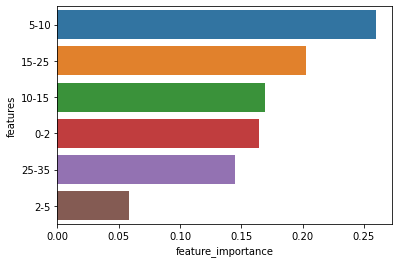

In [210]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [211]:
df_tmp=df

In [212]:
df_tmp["Simple_Linear_processing"]=((df["0-2"]/1.01)+(df["2-5"]/1.035)+(df["5-10"]/1.075)+(df["10-15"]/1.125)+(df["15-25"]/1.2)+(df["25-35"]/1.3))/6

In [213]:
df_tmp.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35,Simple_Linear_processing
0,2016-01-01,434.334015,441.195572,447.708075,466.364840,498.750309,534.542597,579.089847,439.577125
1,2016-01-02,433.437988,441.555658,449.304629,473.648823,485.256552,499.182971,564.673195,432.264515
2,2016-01-03,430.010986,431.838227,439.141789,462.927278,479.747770,510.289750,571.265858,428.933901
3,2016-01-04,433.091003,438.262929,451.086677,473.124309,481.693023,508.334572,549.903248,430.776347
4,2016-01-05,431.959991,436.858665,448.480298,472.109162,487.059216,504.382306,557.297932,431.161629


In [214]:
mean_absolute_percentage_error(df_tmp["Simple_Linear_processing"],df_tmp["y"])

0.005317058223150332

In [215]:
result.shape

(2525, 6)

In [130]:
X_train.head()

,0-2,2-5,5-10,10-15,15-25,25-35
0,315.215834,326.009073,332.272384,350.840688,392.620805,397.984748
1,316.019177,325.179687,343.744181,347.046030,380.675048,411.345998
2,281.797312,287.567506,309.084076,318.255586,348.861613,356.864095
3,266.431939,270.792776,279.448102,293.826811,321.983466,333.127819
4,274.876555,283.592427,300.774182,309.665854,339.119228,356.030006


In [216]:
df_tmp["model_preds"]=ideal_model.predict(result)

In [132]:
df_tmp.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35,Simple_Linear_processing,model_preds
0,2015-01-01,314.248993,315.215834,326.009073,332.272384,350.840688,392.620805,397.984748,313.559099,313.422366
1,2015-01-02,315.032013,316.019177,325.179687,343.744181,347.046030,380.675048,411.345998,314.828357,316.040704
2,2015-01-03,281.082001,281.797312,287.567506,309.084076,318.255586,348.861613,356.864095,282.082170,280.470766
3,2015-01-04,264.195007,266.431939,270.792776,279.448102,293.826811,321.983466,333.127819,261.855394,263.907004
4,2015-01-05,274.473999,274.876555,283.592427,300.774182,309.665854,339.119228,356.030006,276.279069,273.401599


In [219]:
mean_absolute_percentage_error(df["model_preds"],df["y"])

0.0027013355398971682

In [136]:
show_scores(ideal_model)

{'Training MAE': 7.329941342958717,
 'Testing MAE': 390.6374717881948,
 'Training RMSLE': 0.0024393174829957735,
 'Test RMSLE': 0.03397285241771086,
 'Training R^2': 0.9999884839719385,
 'Test R^2': 0.8647650448593367,
 'Training MAPE': 0.001676497423860158,
 'Testing MAPE': 0.01950109493852706}

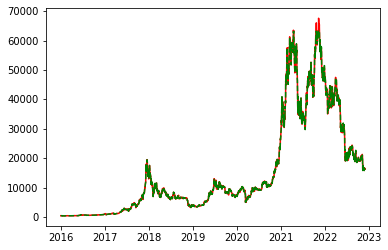

In [228]:
plt.plot(df_tmp["ds"],df_tmp["y"],'r',df_tmp["ds"],df_tmp["model_preds"],'--g');

Text(0.5, 1.0, 'Linear_Processing')

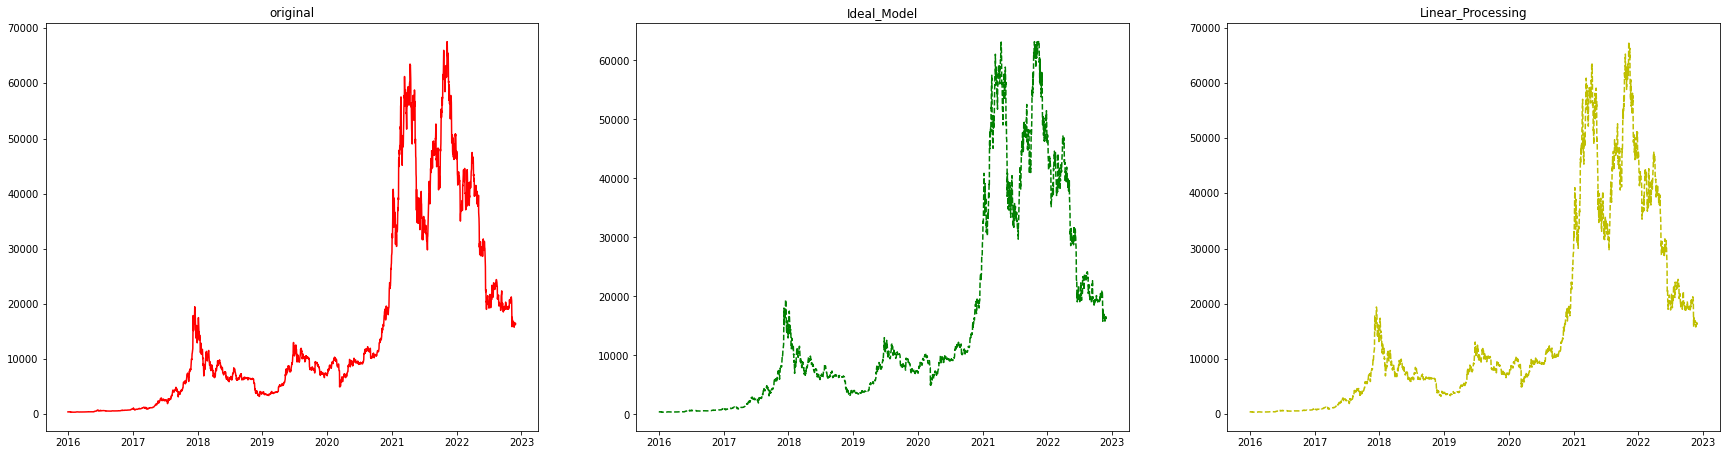

In [235]:
f, a = plt.subplots(1, 3)
f.set_figwidth(30)
f.set_figheight(7.5)
a[0].plot(df_tmp["ds"],df_tmp["y"],'r')
a[0].set_title("original")
a[1].plot(df_tmp["ds"],df_tmp["model_preds"],'--g')
a[1].set_title("Ideal_Model")
a[2].plot(df_tmp["ds"],df_tmp["Simple_Linear_processing"],'--y')
a[2].set_title("Linear_Processing")